## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## The Data

In [2]:
#read the dataset
df = pd.read_csv('new_sum_K-MEANS.csv')
df.head()

,id,average score buffer_None,economy activity_None,PM2.5_None,NOX_None,crime rate buffer_None,restaurant buffer_None,Supermarkets_Supermarkets,NightEconomy,HousingDensity,BuilingHeights,GreenSpace,Noise,SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,culture final-sum_culture sum
0,19664,7.0,164.45817,0.25166,2.21365,109.0,NaN,1.0,605.0,0.807,15.260000,NaN,65.0,671104.0,1025.71040,0
1,19667,14.0,122.34972,0.44992,3.93444,212.0,NaN,NaN,480.0,0.807,4.970000,NaN,NaN,18029.0,774.96143,0
2,19666,7.0,121.69114,0.43419,3.84269,109.0,NaN,NaN,585.0,0.807,6.910000,NaN,NaN,157729.0,941.43817,0
3,19693,NaN,51.90711,0.72489,7.64058,NaN,NaN,NaN,26.0,NaN,11.803999,NaN,65.0,9494.0,708.34326,0
4,19692,NaN,52.36088,0.72889,7.68352,NaN,NaN,NaN,26.0,NaN,39.728430,NaN,65.0,444439.0,1068.41880,1


In [3]:
df.shape

(32440, 16)

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32440 entries, 0 to 32439
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     32440 non-null  int64  
 1   average score buffer_None                              32440 non-null  float64
 2   economy activity_None                                  32440 non-null  float64
 3   PM2.5_None                                             32440 non-null  float64
 4   NOX_None                                               32440 non-null  float64
 5   crime rate buffer_None                                 32440 non-null  float64
 6   restaurant buffer_None                                 32440 non-null  float64
 7   Supermarkets_Supermarkets                              32440 non-null  float64
 8   NightEconomy                                  

In [6]:
df.columns

Index(['id', 'average score buffer_None', 'economy activity_None',
       'PM2.5_None', 'NOX_None', 'crime rate buffer_None',
       'restaurant buffer_None', 'Supermarkets_Supermarkets', 'NightEconomy',
       ' HousingDensity ', 'BuilingHeights ', ' GreenSpace ', ' Noise',
       'SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None',
       'culture final-sum_culture sum'],
      dtype='object')

## Clean DATA

In [7]:
data=df[['id', 'average score buffer_None', 'economy activity_None',
       'PM2.5_None', 'NOX_None', 'crime rate buffer_None',
       'restaurant buffer_None', 'Supermarkets_Supermarkets', 'NightEconomy',
       ' HousingDensity ', 'BuilingHeights ', ' GreenSpace ', ' Noise',
       'SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None',
       'culture final-sum_culture sum']]

In [8]:
data.shape

(32440, 16)

In [9]:
data.head()

,id,average score buffer_None,economy activity_None,PM2.5_None,NOX_None,crime rate buffer_None,restaurant buffer_None,Supermarkets_Supermarkets,NightEconomy,HousingDensity,BuilingHeights,GreenSpace,Noise,SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,culture final-sum_culture sum
0,19664,7.0,164.45817,0.25166,2.21365,109.0,0.0,1.0,605.0,0.807,15.260000,0.0,65.0,671104.0,1025.71040,0
1,19667,14.0,122.34972,0.44992,3.93444,212.0,0.0,0.0,480.0,0.807,4.970000,0.0,0.0,18029.0,774.96143,0
2,19666,7.0,121.69114,0.43419,3.84269,109.0,0.0,0.0,585.0,0.807,6.910000,0.0,0.0,157729.0,941.43817,0
3,19693,0.0,51.90711,0.72489,7.64058,0.0,0.0,0.0,26.0,0.000,11.803999,0.0,65.0,9494.0,708.34326,0
4,19692,0.0,52.36088,0.72889,7.68352,0.0,0.0,0.0,26.0,0.000,39.728430,0.0,65.0,444439.0,1068.41880,1


In [10]:
data.isnull().values.any()

False

In [11]:
datalocation=df[['id']]

In [12]:
datalocation.head()

,id
0,19664
1,19667
2,19666
3,19693
4,19692


In [19]:

# 2. 对数据进行归一化处理（假设你想对所有列进行归一化）
normalized_df = data.copy()
for column in data.columns:
    if normalized_df[column].dtype != 'object':  # 忽略非数值列
        max_value = normalized_df[column].max()
        normalized_df[column] = normalized_df[column] / max_value


import os
save_dir = r'C:\Users\15809\Desktop\data'  # Creat a data folder on the desktop
normalized_csv_file = os.path.join(save_dir, 'normalized_data.csv')
# 3. 将归一化后的数据保存回CSV文件
normalized_df.to_csv(normalized_csv_file, index=False)

In [22]:
#重新读文件，注意下面读取的数据都是属于normalized_data文件的
df = pd.read_csv('normalized_data.csv')#read the 'normalized_data in the folder( I have put the file in the folder)
df.head()

,id,average score buffer_None,economy activity_None,PM2.5_None,NOX_None,crime rate buffer_None,restaurant buffer_None,Supermarkets_Supermarkets,NightEconomy,HousingDensity,BuilingHeights,GreenSpace,Noise,SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,culture final-sum_culture sum
0,0.524373,0.233333,0.427862,0.047964,0.043017,0.196751,0.0,0.5,0.611111,0.077232,0.053405,0.0,0.866667,0.462196,0.638813,0.000000
1,0.524453,0.466667,0.318311,0.085750,0.076457,0.382671,0.0,0.0,0.484848,0.077232,0.017393,0.0,0.000000,0.012417,0.482647,0.000000
2,0.524427,0.233333,0.316597,0.082752,0.074674,0.196751,0.0,0.0,0.590909,0.077232,0.024183,0.0,0.000000,0.108630,0.586329,0.000000
3,0.525147,0.000000,0.135044,0.138156,0.148477,0.000000,0.0,0.0,0.026263,0.000000,0.041310,0.0,0.866667,0.006539,0.441157,0.000000
4,0.525120,0.000000,0.136224,0.138919,0.149311,0.000000,0.0,0.0,0.026263,0.000000,0.139036,0.0,0.866667,0.306090,0.665412,0.111111


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32440 entries, 0 to 32439
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     32440 non-null  float64
 1   average score buffer_None                              32440 non-null  float64
 2   economy activity_None                                  32440 non-null  float64
 3   PM2.5_None                                             32440 non-null  float64
 4   NOX_None                                               32440 non-null  float64
 5   crime rate buffer_None                                 32440 non-null  float64
 6   restaurant buffer_None                                 32440 non-null  float64
 7   Supermarkets_Supermarkets                              32440 non-null  float64
 8   NightEconomy                                  

In [24]:
df.columns

Index(['id', 'average score buffer_None', 'economy activity_None',
       'PM2.5_None', 'NOX_None', 'crime rate buffer_None',
       'restaurant buffer_None', 'Supermarkets_Supermarkets', 'NightEconomy',
       ' HousingDensity ', 'BuilingHeights ', ' GreenSpace ', ' Noise',
       'SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None',
       'culture final-sum_culture sum'],
      dtype='object')

In [30]:
data=df[['id', 'average score buffer_None', 'economy activity_None',
       'PM2.5_None', 'NOX_None', 'crime rate buffer_None',
       'restaurant buffer_None', 'Supermarkets_Supermarkets', 'NightEconomy',
       ' HousingDensity ', 'BuilingHeights ', ' GreenSpace ', ' Noise',
       'SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None',
       'culture final-sum_culture sum']]

## Visualisation

In [31]:
data.corr()

,id,average score buffer_None,economy activity_None,PM2.5_None,NOX_None,crime rate buffer_None,restaurant buffer_None,Supermarkets_Supermarkets,NightEconomy,HousingDensity,BuilingHeights,GreenSpace,Noise,SpaceSyntax_R3000_SpaceSyntax_Choice_R3000_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,culture final-sum_culture sum
id,1.000000,-0.064171,-0.115182,-0.143199,-0.121426,-0.033639,-0.031614,-0.023480,-0.280799,0.148811,-0.094263,-0.003304,-0.029878,-0.057570,-0.140583,-0.015614
average score buffer_None,-0.064171,1.000000,0.382309,0.306496,0.266334,0.839641,0.126452,0.070716,0.118190,-0.454742,0.086864,-0.012461,0.130984,0.380710,0.424360,0.078969
economy activity_None,-0.115182,0.382309,1.000000,0.618974,0.569955,0.394626,0.111937,0.063303,0.157281,-0.502297,0.127828,-0.153594,0.027825,0.218696,0.479457,0.057893
PM2.5_None,-0.143199,0.306496,0.618974,1.000000,0.831949,0.231973,0.259791,0.074826,0.009298,-0.362813,0.275441,-0.100690,0.145929,0.279759,0.547078,0.198972
NOX_None,-0.121426,0.266334,0.569955,0.831949,1.000000,0.196208,0.177750,0.062821,0.017875,-0.339268,0.247728,-0.087434,0.131695,0.260825,0.500803,0.134432
crime rate buffer_None,-0.033639,0.839641,0.394626,0.231973,0.196208,1.000000,0.096464,0.064160,0.182100,-0.435801,0.010928,-0.000627,0.084662,0.317856,0.361838,0.069768
restaurant buffer_None,-0.031614,0.126452,0.111937,0.259791,0.177750,0.096464,1.000000,0.190443,-0.066914,-0.098673,0.192881,-0.051565,0.199865,0.300536,0.266632,0.253247
Supermarkets_Supermarkets,-0.023480,0.070716,0.063303,0.074826,0.062821,0.064160,0.190443,1.000000,-0.000004,-0.052647,0.092172,-0.033659,0.129568,0.182654,0.129610,0.063697
NightEconomy,-0.280799,0.118190,0.157281,0.009298,0.017875,0.182100,-0.066914,-0.000004,1.000000,-0.075290,-0.091701,0.000341,0.002998,0.000340,-0.018839,-0.057017
HousingDensity,0.148811,-0.454742,-0.502297,-0.362813,-0.339268,-0.435801,-0.098673,-0.052647,-0.075290,1.000000,-0.166837,0.053260,-0.027729,-0.205020,-0.435641,-0.056683


Text(0.5, 1.0, 'Heatmap of data correlation')

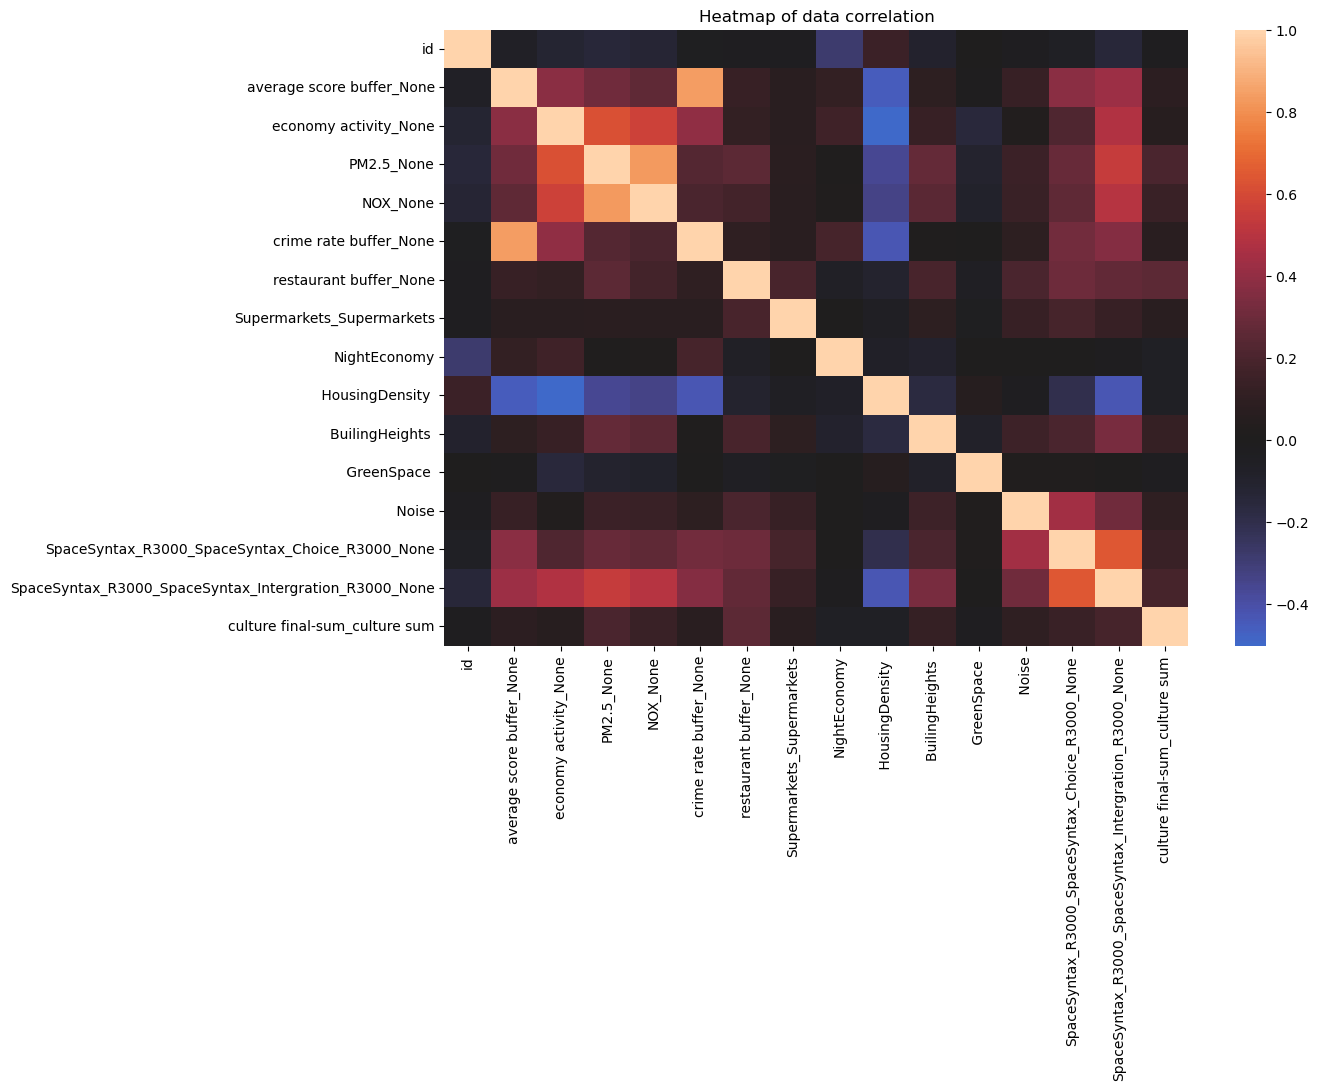

In [32]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df.corr(), cmap = 'icefire',center = 0)
plt.title('Heatmap of data correlation')

## DIVIDE DATA FOR ANALYSIS

In [43]:
data3=df[['BuilingHeights ','average score buffer_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None', ' Noise']]

In [44]:
#the data should be doublicated in order to run the analysis independantly
data1=data3.copy()
data2=data3.copy()

# Alternative you can divide the code into 2 files. DO NOT USE PCA data in KMEANS or the opposite

## K-Means Clustering

### A. Define the number of clusters (Elbow method)

In [45]:
#Fit data and calculate sum of squares(wss)
wss=[]
from sklearn.cluster import KMeans

for i in range (1,21):    
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(data1)
    wss.append(kmeans.inertia_)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

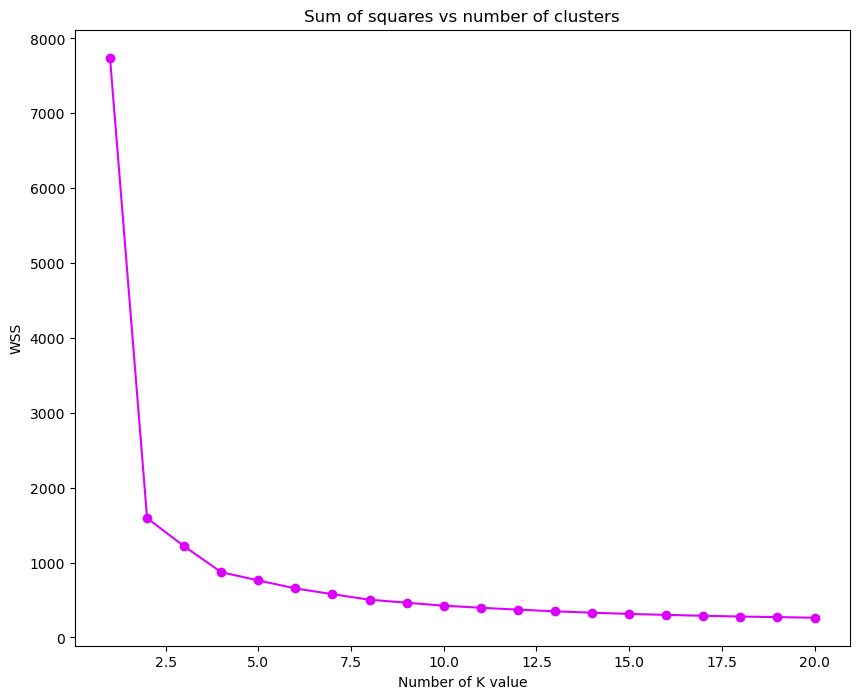

In [46]:
#Visualisation of the k values in order to define the fittest
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wss,marker="o", color="#dc00ff")
plt.xlabel("Number of K value")
plt.ylabel("WSS")
plt.title("Sum of squares vs number of clusters")
#plt.savefig("Elbow.png", dpi=300,transparent=True)
plt.show()

### B.Clustering the data

In [47]:
#import library
from sklearn.cluster import KMeans

In [48]:
#pick number of clusters
kmeans = KMeans(n_clusters=4)

In [49]:
#fit the data
kmeans.fit(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [50]:
#find the cluster centers
kmeans.cluster_centers_

array([[ 3.43782748e-02,  1.61078572e-01,  1.60012493e-01,
        -1.99840144e-15],
       [ 3.87696892e-02,  1.79249104e-01,  2.43904108e-01,
         8.59469284e-01],
       [ 4.60688104e-02,  2.59084462e-01,  4.08783077e-01,
        -1.55431223e-15],
       [ 6.66525659e-02,  2.99447125e-01,  5.57421236e-01,
         9.00834339e-01]])

In [51]:
#identify cluster labels
kmeans.labels_

array([3, 2, 2, ..., 3, 3, 3])

In [52]:
#identify length of cluster labels
len(kmeans.labels_)

32440

In [53]:
#Add cluster column in dataset
data1['CLUSTERS'] = kmeans.fit_predict(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
data1.head()

,BuilingHeights,average score buffer_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,Noise,CLUSTERS
0,0.053405,0.233333,0.638813,0.866667,1
1,0.017393,0.466667,0.482647,0.000000,3
2,0.024183,0.233333,0.586329,0.000000,3
3,0.041310,0.000000,0.441157,0.866667,2
4,0.139036,0.000000,0.665412,0.866667,1


### C.Visualise your Kmeans result

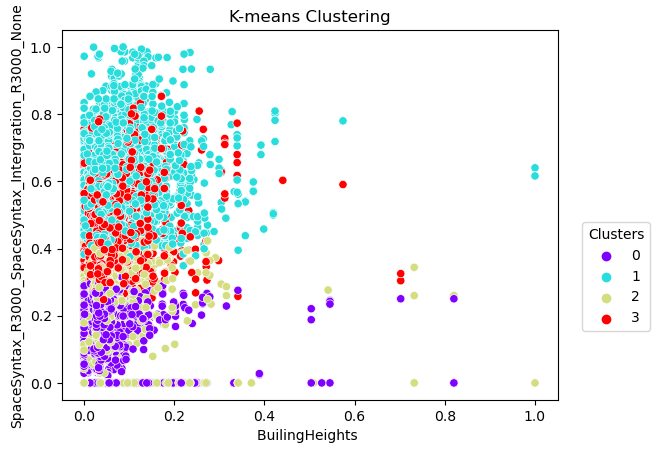

In [55]:
#Scatterplot of clustered data
sns.scatterplot(x=data1['BuilingHeights '], y=data1[ 'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None'], hue= kmeans.labels_, palette='rainbow')
plt.title('K-means Clustering')
plt.legend(loc=0,bbox_to_anchor=(1.2,0.5),title="Clusters")
plt.show()

In [56]:
data1.columns

Index(['BuilingHeights ', 'average score buffer_None',
       'SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None', ' Noise',
       'CLUSTERS'],
      dtype='object')

## Principal Component Analysis

### A. Preprocessing

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scaler.fit(data2)

StandardScaler()

In [59]:
scaled_data = scaler.transform(data2)

### B. Running PCA

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=3)

In [62]:
pca.fit(scaled_data)

PCA(n_components=3)

In [63]:
x_pca = pca.transform(scaled_data)

In [64]:
scaled_data.shape #15 dimensions

(32440, 4)

In [65]:
x_pca.shape #3 dimensions

(32440, 3)

### C.Interpretation of results

In [66]:
pca.components_

array([[ 0.42359946,  0.4818738 ,  0.6355558 ,  0.42945309],
       [ 0.65556495, -0.69779528, -0.09260385,  0.27338776],
       [ 0.52632136,  0.15687704,  0.09154923, -0.83065887]])

In [67]:
df_comp = pd.DataFrame(pca.components_,columns=data2.columns)

<Axes: >

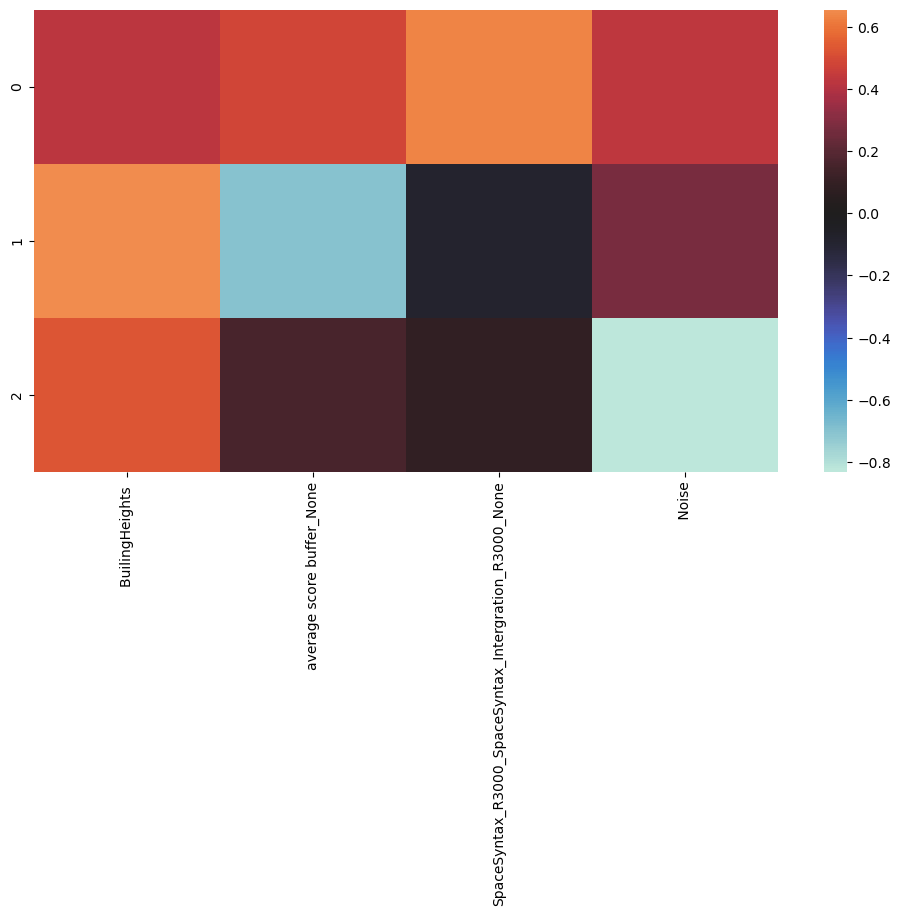

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='icefire',center = 0)

In [69]:
cmap = sns.diverging_palette(180, 295, s=100, l=50,
                                  n=10, center= "dark", as_cmap = True)

#Documentation: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

<Axes: >

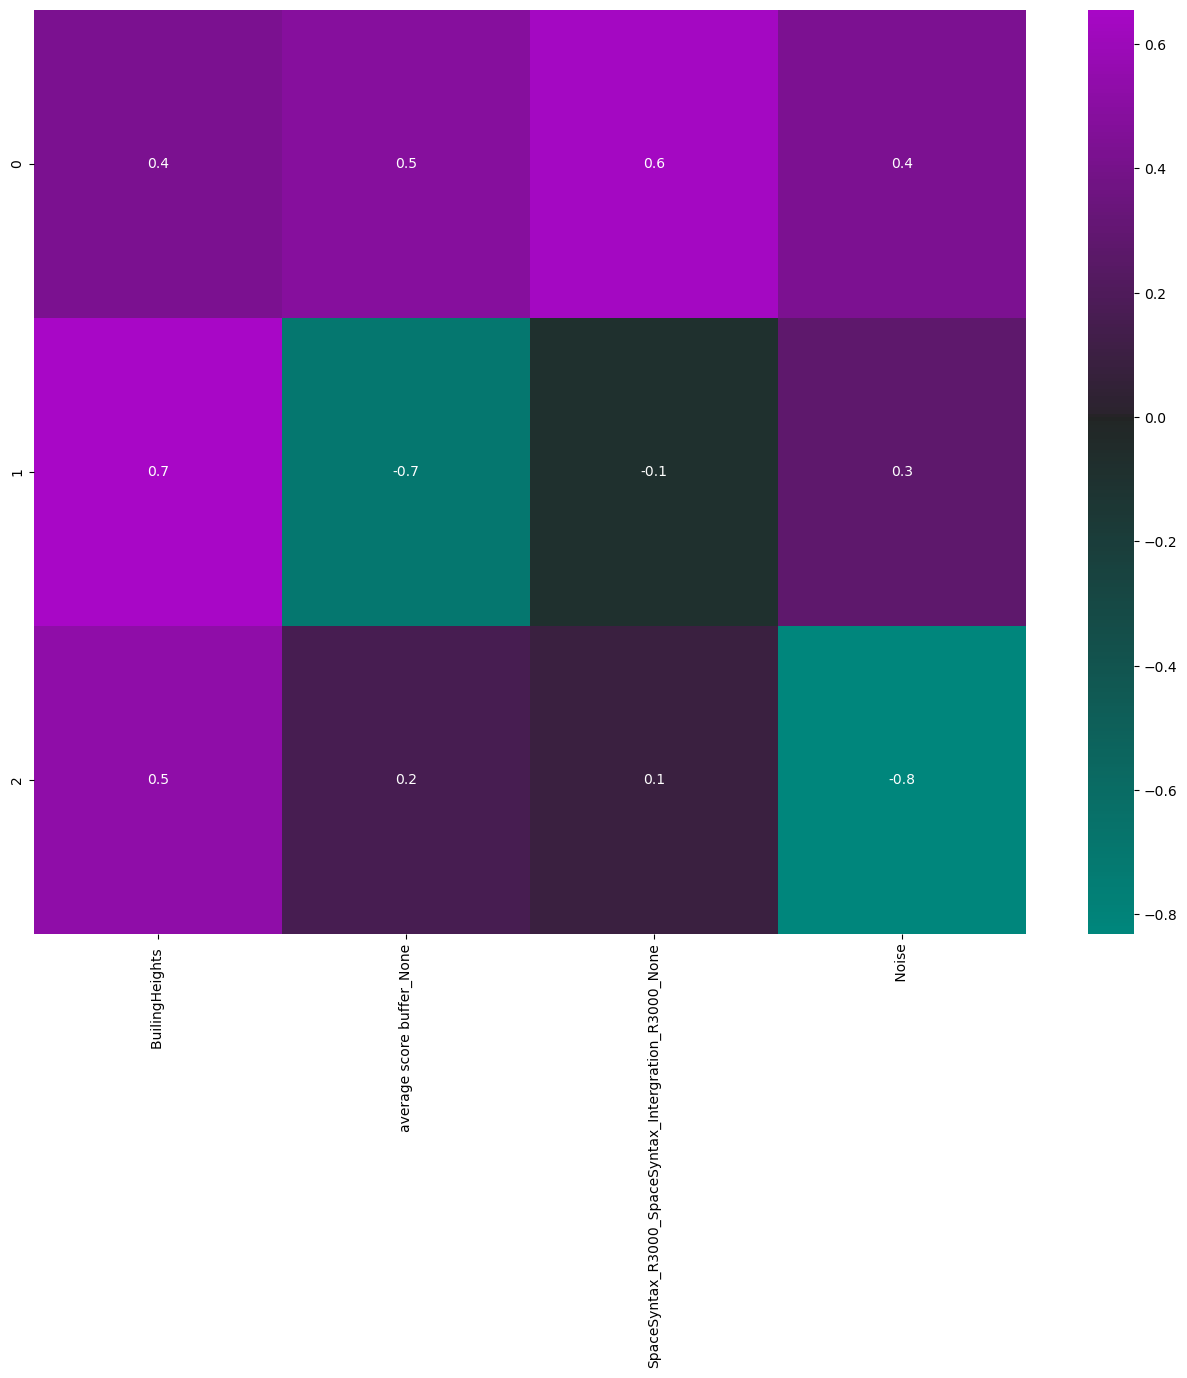

In [70]:
plt.figure(figsize=(16,12))
sns.heatmap(df_comp,cmap= cmap,center = 0, annot=True,fmt = ".1f")

In [71]:
df_comp.head()

,BuilingHeights,average score buffer_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,Noise
0,0.423599,0.481874,0.635556,0.429453
1,0.655565,-0.697795,-0.092604,0.273388
2,0.526321,0.156877,0.091549,-0.830659


In [72]:
df=pd.DataFrame(x_pca, columns = ['0','1','2'])

In [73]:
df.head()

,0,1,2
0,1.653570,0.238571,-0.718234
1,0.893369,-2.232212,0.728326
2,0.322759,-0.738642,0.541505
3,-0.137163,1.585414,-1.291315
4,1.619971,3.008713,0.051171


In [74]:
datalocation.head()

,id
0,19664
1,19667
2,19666
3,19693
4,19692


In [75]:
df_prefinal=pd.concat([df,datalocation],axis=1)

In [76]:
df_prefinal.head()

,0,1,2,id
0,1.653570,0.238571,-0.718234,19664
1,0.893369,-2.232212,0.728326,19667
2,0.322759,-0.738642,0.541505,19666
3,-0.137163,1.585414,-1.291315,19693
4,1.619971,3.008713,0.051171,19692


In [77]:
df_final=pd.concat([df_prefinal, data1],axis=1)

In [78]:
df_final.head()

,0,1,2,id,BuilingHeights,average score buffer_None,SpaceSyntax_R3000_SpaceSyntax_Intergration_R3000_None,Noise,CLUSTERS
0,1.653570,0.238571,-0.718234,19664,0.053405,0.233333,0.638813,0.866667,1
1,0.893369,-2.232212,0.728326,19667,0.017393,0.466667,0.482647,0.000000,3
2,0.322759,-0.738642,0.541505,19666,0.024183,0.233333,0.586329,0.000000,3
3,-0.137163,1.585414,-1.291315,19693,0.041310,0.000000,0.441157,0.866667,2
4,1.619971,3.008713,0.051171,19692,0.139036,0.000000,0.665412,0.866667,1


In [50]:
df_final.to_csv('FinalResult5.csv', encoding='utf-8', index=False)